Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [45]:
import pandas as pd
import numpy as np

Read files

In [46]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56077,ZWE,Africa,Zimbabwe,2020-12-20,12325.0,174.0,154.143,320.0,2.0,1.857,829.244,11.707,10.371,21.530,0.135,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2144.0,198891.0,13.382,0.144,1625.0,0.109,0.095,10.5,tests performed,NaN,NaN,69.44,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56078,ZWE,Africa,Zimbabwe,2020-12-21,12422.0,97.0,152.000,322.0,2.0,1.857,835.771,6.526,10.227,21.665,0.135,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205.0,200096.0,13.463,0.081,1565.0,0.105,0.097,10.3,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56079,ZWE,Africa,Zimbabwe,2020-12-22,12544.0,122.0,146.000,326.0,4.0,2.286,843.979,8.208,9.823,21.934,0.269,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56080,ZWE,Africa,Zimbabwe,2020-12-23,12656.0,112.0,129.571,330.0,4.0,2.429,851.515,7.536,8.718,22.203,0.269,0.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56082 entries, 0 to 56081
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            55760 non-null  object 
 1   continent                           55422 non-null  object 
 2   location                            56082 non-null  object 
 3   date                                56082 non-null  object 
 4   total_cases                         55525 non-null  float64
 5   new_cases                           55519 non-null  float64
 6   new_cases_smoothed                  54563 non-null  float64
 7   total_deaths                        47360 non-null  float64
 8   new_deaths                          47359 non-null  float64
 9   new_deaths_smoothed                 54563 non-null  float64
 10  total_cases_per_million             55203 non-null  float64
 11  new_cases_per_million               55197

In [48]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
include_uk

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52722,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52723,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52724,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52725,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52726,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53046,GBR,Europe,United Kingdom,2020-12-20,2046161.0,36084.0,27381.571,67503.0,326.0,462.286,30141.132,531.538,403.346,994.358,4.802,6.810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10064.676,148.258,433470.0,48036807.0,707.61,6.385,373781.0,5.506,0.073,13.7,tests performed,616933.0,0.91,78.70,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53047,GBR,Europe,United Kingdom,2020-12-21,2079678.0,33517.0,29258.714,67718.0,215.0,459.714,30634.857,493.725,430.998,997.525,3.167,6.772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423675.0,48469931.0,713.99,6.241,396256.0,5.837,0.074,13.5,tests performed,NaN,NaN,78.70,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53048,GBR,Europe,United Kingdom,2020-12-22,2116609.0,36931.0,31881.857,68409.0,691.0,486.143,31178.872,544.015,469.638,1007.704,10.179,7.161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53049,GBR,Europe,United Kingdom,2020-12-23,2155996.0,39387.0,33894.286,69157.0,748.0,505.571,31759.065,580.193,499.282,1018.723,11.018,7.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [49]:
uk_newcase = pd.DataFrame({'date':include_uk.date , 'new_cases': include_uk.new_cases})
uk_newcase

,date,new_cases
52722,2020-01-31,2.0
52723,2020-02-01,0.0
52724,2020-02-02,0.0
52725,2020-02-03,6.0
52726,2020-02-04,0.0
...,...,...
53046,2020-12-20,36084.0
53047,2020-12-21,33517.0
53048,2020-12-22,36931.0
53049,2020-12-23,39387.0


Rename columns

In [50]:
uk_newcase.rename(columns={'date':'ds', 'new_cases': 'y'}, inplace=True)
uk_newcase

,ds,y
52722,2020-01-31,2.0
52723,2020-02-01,0.0
52724,2020-02-02,0.0
52725,2020-02-03,6.0
52726,2020-02-04,0.0
...,...,...
53046,2020-12-20,36084.0
53047,2020-12-21,33517.0
53048,2020-12-22,36931.0
53049,2020-12-23,39387.0


Graph time series

Text(0, 0.5, 'y')

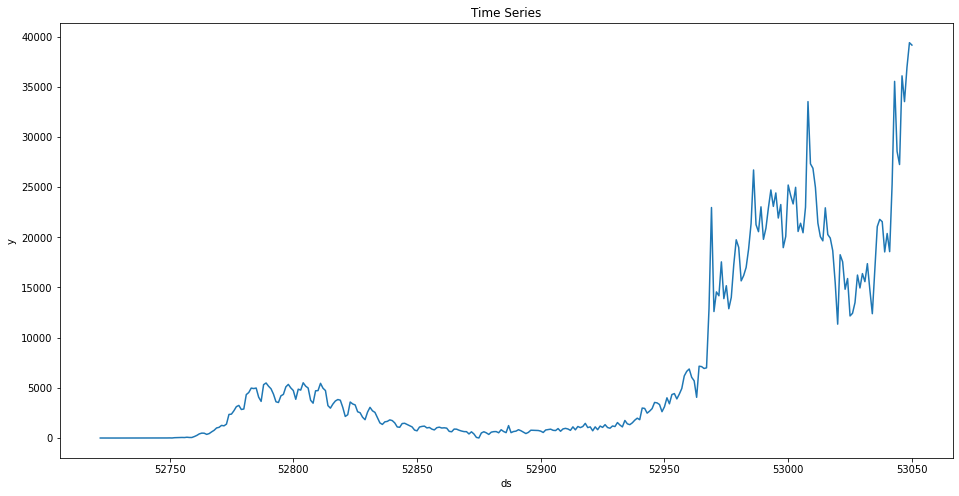

In [51]:
import matplotlib.pyplot as plt

uk_newcase['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Split time series

In [52]:
month = '2021-01'

test = pd.DataFrame({
    'date': pd.date_range(
        start = pd.Timestamp(month),                        
        end = pd.Timestamp(month) + pd.offsets.MonthEnd(0),
        freq = 'D'
    )
})
test

,date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
5,2021-01-06
6,2021-01-07
7,2021-01-08
8,2021-01-09
9,2021-01-10


In [53]:
test.rename(columns={'date':'ds'}, inplace=True)
test

,ds
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
5,2021-01-06
6,2021-01-07
7,2021-01-08
8,2021-01-09
9,2021-01-10


In [54]:
X_train = uk_newcase.loc[uk_newcase["ds"]<"2020-12-01"]
X_val  = uk_newcase.loc[uk_newcase["ds"]>="2020-12-01"]
X_test = test.loc[test["ds"]>="2021-01-01"]

FB Prophet

In [55]:
from fbprophet import Prophet

model = Prophet()
model.fit(X_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict on validation set

In [56]:
forecast = model.predict(X_val.drop(columns="y"))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-01,25067.074041,20872.855274,28779.466513,25067.074041,25067.074041,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,0.0,0.0,0.0,24958.470164
1,2020-12-02,25305.204262,22118.007612,29481.724948,25305.204262,25305.204262,454.555019,454.555019,454.555019,454.555019,454.555019,454.555019,0.0,0.0,0.0,25759.759281
2,2020-12-03,25543.334482,22352.524410,29612.240599,25541.094990,25543.818512,544.407892,544.407892,544.407892,544.407892,544.407892,544.407892,0.0,0.0,0.0,26087.742374
3,2020-12-04,25781.464702,22000.953572,29283.775275,25771.545140,25785.347277,13.194344,13.194344,13.194344,13.194344,13.194344,13.194344,0.0,0.0,0.0,25794.659046
4,2020-12-05,26019.594923,22185.110963,29568.157520,26001.350554,26031.320414,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,0.0,0.0,0.0,25959.594017
5,2020-12-06,26257.725143,21932.583784,29531.442714,26229.878102,26277.912232,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,0.0,0.0,0.0,25970.111935
6,2020-12-07,26495.855363,21847.514978,29735.407893,26457.336470,26525.783956,-555.939264,-555.939264,-555.939264,-555.939264,-555.939264,-555.939264,0.0,0.0,0.0,25939.916099
7,2020-12-08,26733.985583,22871.059777,30343.351128,26685.533453,26776.193250,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,0.0,0.0,0.0,26625.381706
8,2020-12-09,26972.115804,23634.686558,31129.114463,26911.751922,27029.013484,454.555019,454.555019,454.555019,454.555019,454.555019,454.555019,0.0,0.0,0.0,27426.670823
9,2020-12-10,27210.246024,23953.847897,31606.404959,27134.897165,27281.776431,544.407892,544.407892,544.407892,544.407892,544.407892,544.407892,0.0,0.0,0.0,27754.653916


In [57]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

8445.561674591369


In [58]:
forecast.yhat[forecast.yhat < 0] = 0

df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,predicted
0,13497.0,24958
1,16237.0,25759
2,14951.0,26087
3,16382.0,25794
4,15579.0,25959
5,17372.0,25970
6,14774.0,25939
7,12386.0,26625
8,16634.0,27426
9,21066.0,27754


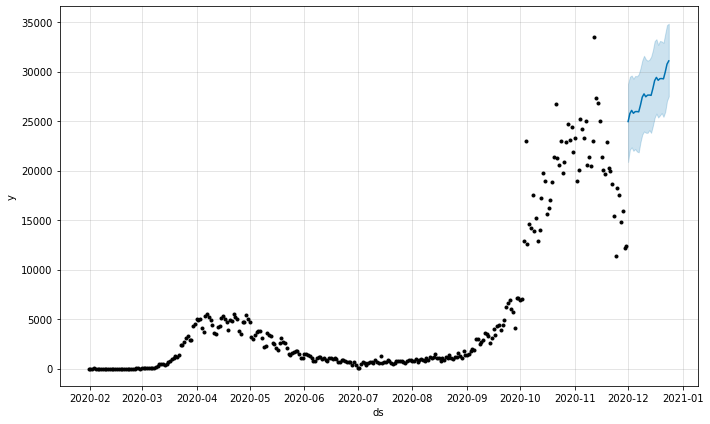

In [59]:
fig1 = model.plot(forecast)

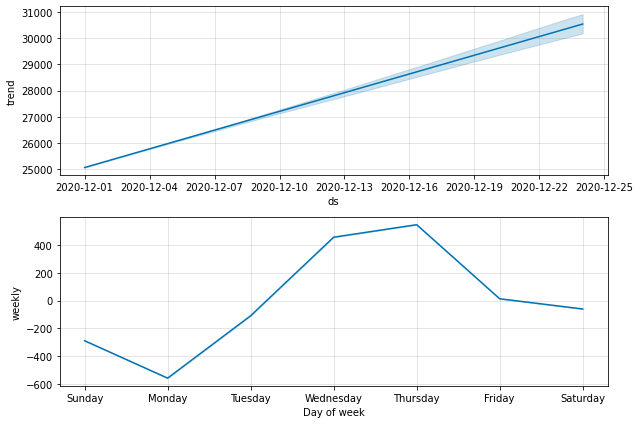

In [60]:
fig2 = model.plot_components(forecast)

In [61]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [62]:
plot_components_plotly(model, forecast)

Predict on test set

In [63]:
prediction = model.predict(X_test)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,32449.110870,28771.655287,36297.414193,31905.522176,33091.137508,13.194344,13.194344,13.194344,13.194344,13.194344,13.194344,0.0,0.0,0.0,32462.305214
1,2021-01-02,32687.241090,28844.873289,36596.790613,32104.277325,33356.430774,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,0.0,0.0,0.0,32627.240184
2,2021-01-03,32925.371311,28693.711194,36351.672204,32304.847183,33626.992620,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,0.0,0.0,0.0,32637.758102
3,2021-01-04,33163.501531,28768.369199,36283.318287,32506.713038,33897.079426,-555.939264,-555.939264,-555.939264,-555.939264,-555.939264,-555.939264,0.0,0.0,0.0,32607.562267
4,2021-01-05,33401.631751,29455.719272,37036.042785,32720.345917,34167.578001,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,0.0,0.0,0.0,33293.027874
5,2021-01-06,33639.761971,30354.948289,37711.511727,32931.220969,34443.841445,454.555019,454.555019,454.555019,454.555019,454.555019,454.555019,0.0,0.0,0.0,34094.316991
6,2021-01-07,33877.892192,30996.823879,38248.523125,33133.814157,34708.111669,544.407892,544.407892,544.407892,544.407892,544.407892,544.407892,0.0,0.0,0.0,34422.300084
7,2021-01-08,34116.022412,30279.688964,37879.847921,33331.640787,34970.514320,13.194344,13.194344,13.194344,13.194344,13.194344,13.194344,0.0,0.0,0.0,34129.216756
8,2021-01-09,34354.152632,30406.225366,38064.829569,33523.049381,35245.668571,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,0.0,0.0,0.0,34294.151726
9,2021-01-10,34592.282853,30450.079942,38143.825281,33729.563501,35516.180320,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,0.0,0.0,0.0,34304.669644


In [64]:
prediction.yhat[prediction.yhat < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_cases': prediction.yhat.values.astype(int)})
output.to_csv('new_cases.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
#upload submission
new_cases = pd.read_csv("new_cases.csv")
new_cases

,date,new_cases
0,2021-01-01,32462
1,2021-01-02,32627
2,2021-01-03,32637
3,2021-01-04,32607
4,2021-01-05,33293
5,2021-01-06,34094
6,2021-01-07,34422
7,2021-01-08,34129
8,2021-01-09,34294
9,2021-01-10,34304


In [66]:
df_out = forecast.append(prediction)
df_out

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-01,25067.074041,20872.855274,28779.466513,25067.074041,25067.074041,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,0.0,0.0,0.0,24958.470164
1,2020-12-02,25305.204262,22118.007612,29481.724948,25305.204262,25305.204262,454.555019,454.555019,454.555019,454.555019,454.555019,454.555019,0.0,0.0,0.0,25759.759281
2,2020-12-03,25543.334482,22352.524410,29612.240599,25541.094990,25543.818512,544.407892,544.407892,544.407892,544.407892,544.407892,544.407892,0.0,0.0,0.0,26087.742374
3,2020-12-04,25781.464702,22000.953572,29283.775275,25771.545140,25785.347277,13.194344,13.194344,13.194344,13.194344,13.194344,13.194344,0.0,0.0,0.0,25794.659046
4,2020-12-05,26019.594923,22185.110963,29568.157520,26001.350554,26031.320414,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,-60.000906,0.0,0.0,0.0,25959.594017
5,2020-12-06,26257.725143,21932.583784,29531.442714,26229.878102,26277.912232,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,-287.613208,0.0,0.0,0.0,25970.111935
6,2020-12-07,26495.855363,21847.514978,29735.407893,26457.336470,26525.783956,-555.939264,-555.939264,-555.939264,-555.939264,-555.939264,-555.939264,0.0,0.0,0.0,25939.916099
7,2020-12-08,26733.985583,22871.059777,30343.351128,26685.533453,26776.193250,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,-108.603877,0.0,0.0,0.0,26625.381706
8,2020-12-09,26972.115804,23634.686558,31129.114463,26911.751922,27029.013484,454.555019,454.555019,454.555019,454.555019,454.555019,454.555019,0.0,0.0,0.0,27426.670823
9,2020-12-10,27210.246024,23953.847897,31606.404959,27134.897165,27281.776431,544.407892,544.407892,544.407892,544.407892,544.407892,544.407892,0.0,0.0,0.0,27754.653916


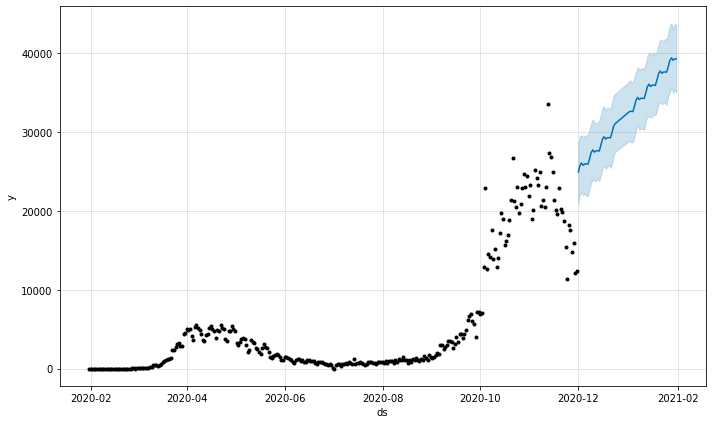

In [67]:
fig1 = model.plot(df_out)

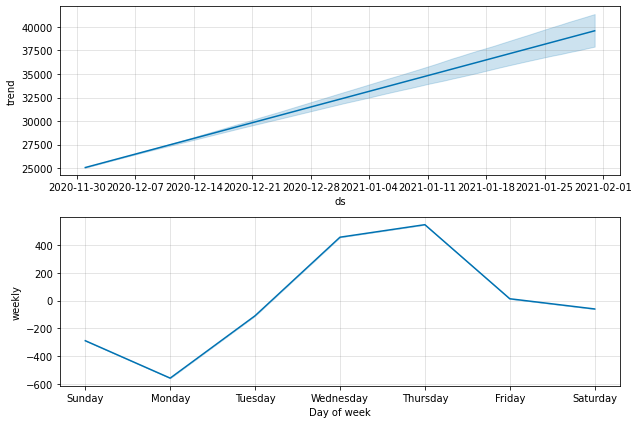

In [68]:
fig2 = model.plot_components(df_out)

In [69]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, df_out)

In [70]:
plot_components_plotly(model, df_out)

Statsmodels

Naive approach

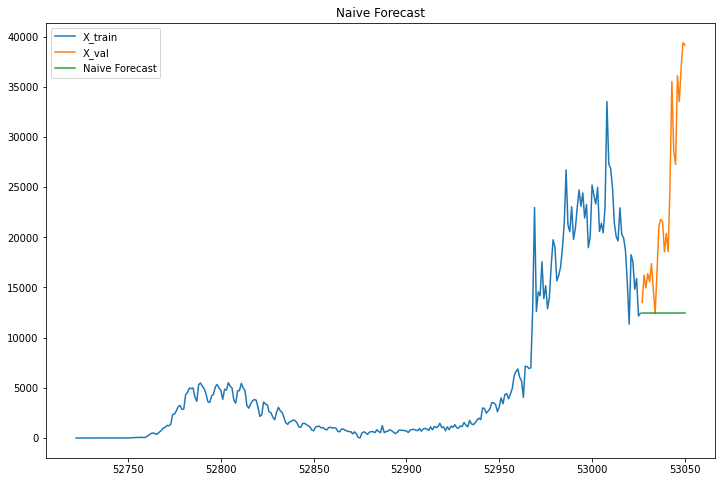

In [71]:
#naive approach
dd= np.asarray(X_train.y) 
y_hat = X_val.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [72]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val.y, y_hat.naive)) 
print(rms)

13999.704846591112


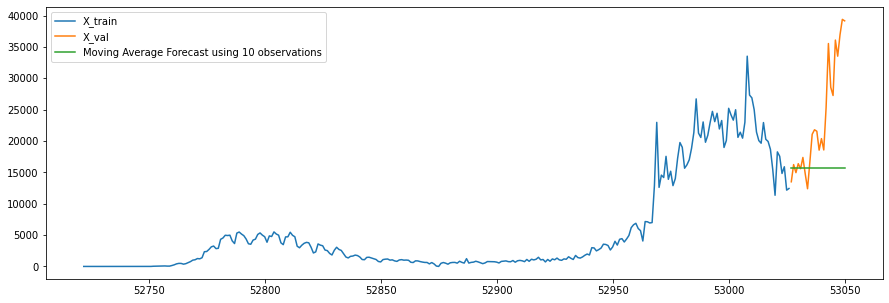

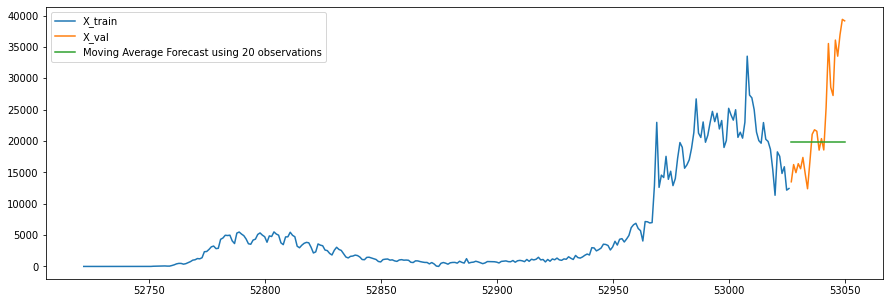

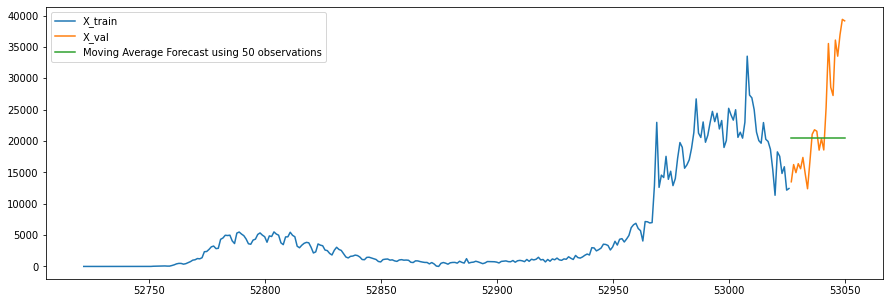

In [73]:
#moving average
# Considering rolling mean for last 10, 20, 50 days and visualize the results.
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [74]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.moving_avg_forecast)) 
print(rms)

9158.696424713873


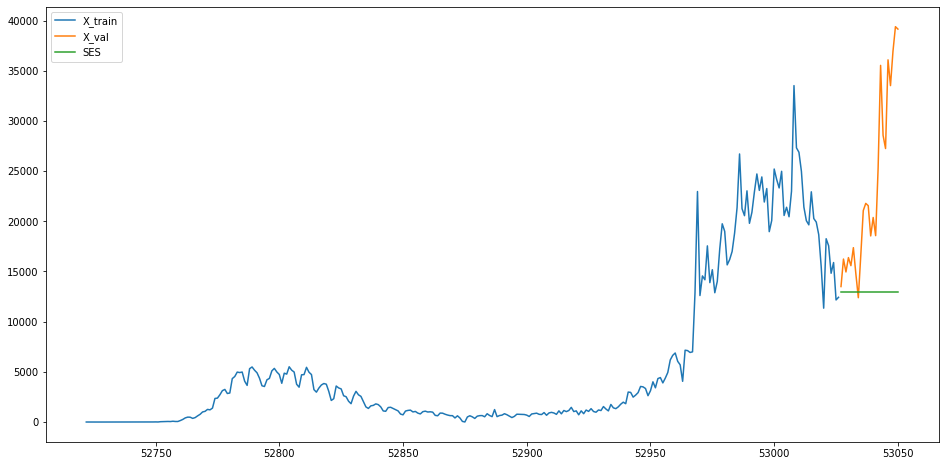

In [75]:
#simple exponential moving
#Here the predictions are made by assigning larger weight to the recent values and lesser weight to the old values.
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
y_hat_avg = X_val.copy() 
fit2 = SimpleExpSmoothing(np.asarray(X_train['y'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(X_val)) 
plt.figure(figsize=(16,8)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [76]:
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.SES)) 
print(rms)

13626.712821729825


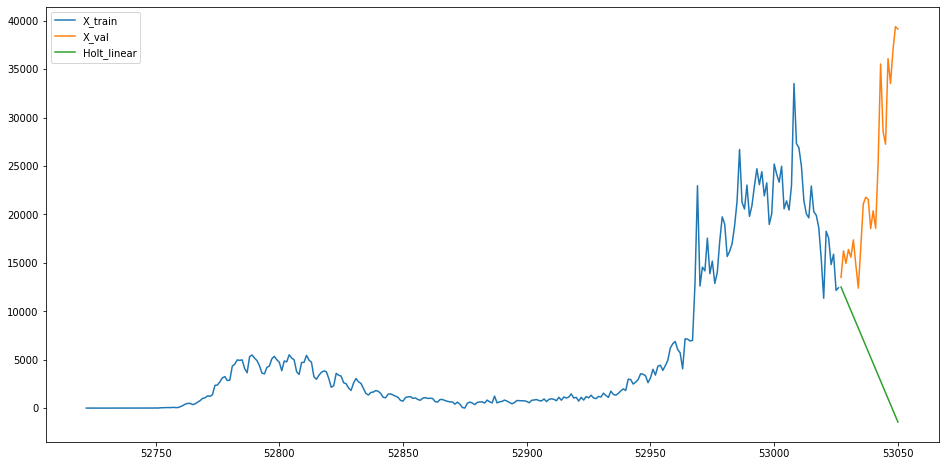

In [77]:
#holt's linear trend model
from statsmodels.tsa.api import Holt

y_hat_avg = X_val.copy() 
fit1 = Holt(np.asarray(X_train['y'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(X_val)) 
plt.figure(figsize=(16,8)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [78]:
# Calculating the RMSE of the model
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.Holt_linear)) 
print(rms)

21876.448004007023


In [79]:
y_hat_avg.Holt_linear.head()

53027    12503.014055
53028    11896.863519
53029    11290.712983
53030    10684.562447
53031    10078.411911
Name: Holt_linear, dtype: float64

In [80]:
X_val.y.shape, y_hat_avg.Holt_linear.shape

((24,), (24,))

In [96]:
predict=fit1.forecast(len(X_test))
predict[predict < 0] = 0
predict = predict.astype(int)

In [97]:
X_test['prediction']=predict

In [98]:
X_test

,ds,prediction
0,2021-01-01,12503
1,2021-01-02,11896
2,2021-01-03,11290
3,2021-01-04,10684
4,2021-01-05,10078
5,2021-01-06,9472
6,2021-01-07,8866
7,2021-01-08,8259
8,2021-01-09,7653
9,2021-01-10,7047


In [99]:
output = pd.DataFrame({'date': X_test.ds, 'new_cases': X_test.prediction.values.ravel()})
output.to_csv('new_cases.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [100]:
#upload submission
new_cases = pd.read_csv("new_cases.csv")
new_cases

,date,new_cases
0,2021-01-01,12503
1,2021-01-02,11896
2,2021-01-03,11290
3,2021-01-04,10684
4,2021-01-05,10078
5,2021-01-06,9472
6,2021-01-07,8866
7,2021-01-08,8259
8,2021-01-09,7653
9,2021-01-10,7047
